# City Schools Analysis


**Introduction:**
This analysis aims to uncover trends in school performance by combining simulated district-wide standardized test results for student math and reading scores with relevant school information. The simulated data has been generated to explore potential relationships between various factors and student achievement. Schools were categorized based on their per-student budget, size, and whether they were classified as charter or district schools, after which average math and reading scores for students were compared. The primary goal is to gain insights into the factors that influence student achievement. 

**Key Findings:**

- Higher school budgets did not necessarily lead to better test results; in fact, schools with budgets in the highest range of `$645 - $680` per student performed worse than those with budgets in the lowest range of less than $585 per student.
- Smaller and medium-sized schools significantly outperformed larger schools in math proficiency, with passing rates of 89-91% compared to 67%.
- Charter schools consistently outperformed public district schools across various metrics. Further analysis is needed to determine whether this is due to school practices or the smaller student populations served by charter schools.

**Visuals:**
This analysis includes various charts and graphs that visually represent the data, providing additional insights into school performance trends.

**Recommendations:**
Investigate the reasons behind the success of charter schools to potentially implement effective practices in public district schools. Determine if the smaller student populations of charter schools explains their success. 

**Data Sources:**
The analysis utilizes simulated district-wide standardized test results and school information. Data preprocessing steps were taken to ensure data quality and consistency.

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])


In [2]:
MINIMUM_PASSING_SCORE = 70

In [3]:
student_data

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84
...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90


In [4]:
type(student_data)

pandas.core.frame.DataFrame

In [5]:
school_data

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500
5,5,Wilson High School,Charter,2283,1319574
6,6,Cabrera High School,Charter,1858,1081356
7,7,Bailey High School,District,4976,3124928
8,8,Holden High School,Charter,427,248087
9,9,Pena High School,Charter,962,585858


In [6]:
school_data_complete

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [7]:
# Check the data types of all columns in the DataFrame
data_types = school_data_complete.dtypes

# Display the data types
print("Data Types:")
print(data_types)

Data Types:
Student ID        int64
student_name     object
gender           object
grade            object
school_name      object
reading_score     int64
math_score        int64
School ID         int64
type             object
size              int64
budget            int64
dtype: object


In [8]:
# Checking for NaN values in the entire DataFrame:
nan_check = school_data_complete.isna()

if nan_check.any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


In [9]:
# Check the data types
result = school_data.dtypes

print("Output:")
print(result)

Output:
School ID       int64
school_name    object
type           object
size            int64
budget          int64
dtype: object


In [10]:
# Select only the numerical columns 
numerical_columns = school_data_complete.select_dtypes(include=[np.number])

# Calculate Z-scores
z_scores = np.abs(stats.zscore(numerical_columns))

# Define the threshold for identifying outliers
threshold = 3

# Create a mask to identify outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Get the rows containing outliers from the original DataFrame
outliers = school_data_complete[outlier_mask]

outliers

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget


## District Summary

In [11]:
# Total number of unique schools
school_count = school_data_complete.school_name.nunique()
print(school_count)

15


In [12]:
# Total number of students
student_count = school_data_complete.student_name.count()
print(student_count)

39170


In [13]:
# Total budget
total_budget = school_data.budget.sum()
print(total_budget)

24649428


In [14]:
# Average math score
average_math_score = school_data_complete.math_score.mean()
print(average_math_score)

78.98537145774827


In [15]:
# Average reading score
average_reading_score = school_data_complete.reading_score.mean()
print(average_reading_score)

81.87784018381414


In [16]:
# Percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
passing_math_percentage

74.9808526933878

In [17]:
# Percentage of students who passeed reading  
passing_reading_count = school_data_complete[(school_data_complete["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / float(student_count) * 100
passing_reading_percentage

85.80546336482001

In [18]:
# Percentage of students that passed math and reading
passing_math_reading_count = school_data_complete[
    (school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)
].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100
overall_passing_rate

65.17232575950983

In [19]:
# High-level snapshot of the district's key metrics in a DataFrame
district_summary = pd.DataFrame(
  {
     "Total Schools": [school_count], "Total Students": [student_count], "Total Budget": [total_budget], "Average Math Score": [average_math_score],
                      "Average Reading Score": [average_reading_score], "% Passing Math": [passing_math_percentage], "% Passing Reading": [passing_reading_percentage],
                      "% Overall Passing": [overall_passing_rate]
  }
)
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,65.172326


In [20]:
# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [21]:
# Identify the school type
school_types = school_data.set_index(["school_name"])["type"]
school_types

school_name
Huang High School        District
Figueroa High School     District
Shelton High School       Charter
Hernandez High School    District
Griffin High School       Charter
Wilson High School        Charter
Cabrera High School       Charter
Bailey High School       District
Holden High School        Charter
Pena High School          Charter
Wright High School        Charter
Rodriguez High School    District
Johnson High School      District
Ford High School         District
Thomas High School        Charter
Name: type, dtype: object

In [22]:
# Total student count per school

per_school_counts=school_data_complete["school_name"].value_counts()
per_school_counts

Bailey High School       4976
Johnson High School      4761
Hernandez High School    4635
Rodriguez High School    3999
Figueroa High School     2949
Huang High School        2917
Ford High School         2739
Wilson High School       2283
Cabrera High School      1858
Wright High School       1800
Shelton High School      1761
Thomas High School       1635
Griffin High School      1468
Pena High School          962
Holden High School        427
Name: school_name, dtype: int64

In [23]:
# Total school budget and per capita spending
per_school_budget = school_data_complete.groupby(["school_name"]).mean()["budget"]
per_school_capita = per_school_budget / per_school_counts
per_school_budget

school_name
Bailey High School       3124928.0
Cabrera High School      1081356.0
Figueroa High School     1884411.0
Ford High School         1763916.0
Griffin High School       917500.0
Hernandez High School    3022020.0
Holden High School        248087.0
Huang High School        1910635.0
Johnson High School      3094650.0
Pena High School          585858.0
Rodriguez High School    2547363.0
Shelton High School      1056600.0
Thomas High School       1043130.0
Wilson High School       1319574.0
Wright High School       1049400.0
Name: budget, dtype: float64

In [24]:
per_school_capita

Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0
Wright High School       583.0
dtype: float64

In [25]:
per_school_capita

Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0
Wright High School       583.0
dtype: float64

In [26]:
# Average test scores 

averagesBySchoolDF = school_data_complete.groupby(["school_name"]).mean()

per_school_math = averagesBySchoolDF['math_score']

In [27]:
#per_school_reading = 
per_school_reading = averagesBySchoolDF['reading_score']
per_school_reading

school_name
Bailey High School       81.033963
Cabrera High School      83.975780
Figueroa High School     81.158020
Ford High School         80.746258
Griffin High School      83.816757
Hernandez High School    80.934412
Holden High School       83.814988
Huang High School        81.182722
Johnson High School      80.966394
Pena High School         84.044699
Rodriguez High School    80.744686
Shelton High School      83.725724
Thomas High School       83.848930
Wilson High School       83.989488
Wright High School       83.955000
Name: reading_score, dtype: float64

In [28]:
# Number of schools with math scores of 70 or higher
numberOfSchoolsPassingMath = school_data_complete[(school_data_complete["math_score"] >= MINIMUM_PASSING_SCORE)]
numberOfSchoolsPassingMath

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [29]:
# Number of schools with reading scores of 70 or higher
numberOfSchoolsPassingReading = school_data_complete[(school_data_complete["reading_score"] >= MINIMUM_PASSING_SCORE)]
numberOfSchoolsPassingReading

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [30]:
# Schools that passed both math and reading with scores of 70 or higher
passing_math_and_reading = school_data_complete[
    (school_data_complete["reading_score"] >= 70) & (school_data_complete["math_score"] >= 70)
]
passing_math_and_reading

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635
9,9,Matthew Greene,M,10th,Huang High School,96,84,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [31]:
# Passing rates
per_school_passing_math = numberOfSchoolsPassingMath.groupby(["school_name"]).count()["student_name"] / per_school_counts * 100
per_school_passing_reading = numberOfSchoolsPassingReading.groupby(["school_name"]).count()["student_name"] / per_school_counts * 100
overall_passing_rate = passing_math_and_reading.groupby(["school_name"]).count()["student_name"] / per_school_counts * 100
overall_passing_rate

Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64

In [32]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.

per_school_summary = pd.DataFrame(
{
    "School Type": school_types, "Total Students": per_school_counts, "Total School Budget": per_school_budget, "Per Student Budget": per_school_capita,
    "Average Math Score": per_school_math, "Average Reading Score": per_school_reading, "% Passing Math": passing_math_percentage, "% Passing Reading": passing_reading_percentage,
    "% Overall Passing": overall_passing_rate
}

)


# Formatting
#district_summary = pd.DataFrame
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the DataFrame
per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,74.980853,85.805463,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,74.980853,85.805463,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,74.980853,85.805463,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,74.980853,85.805463,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,74.980853,85.805463,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,74.980853,85.805463,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,74.980853,85.805463,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,74.980853,85.805463,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,74.980853,85.805463,53.539172
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,74.980853,85.805463,90.540541


## Highest-Performing Schools (by % Overall Passing)

In [33]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
Desc_overall_passing_rate_df = per_school_summary.sort_values("% Overall Passing", ascending=False)
Desc_overall_passing_rate_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,74.980853,85.805463,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,74.980853,85.805463,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,74.980853,85.805463,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,74.980853,85.805463,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,74.980853,85.805463,90.540541


## Bottom Performing Schools (By % Overall Passing)

In [34]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
Ascending_overall_passing_rate_df = per_school_summary.sort_values("% Overall Passing", ascending=True)
Ascending_overall_passing_rate_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,74.980853,85.805463,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,74.980853,85.805463,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,74.980853,85.805463,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,74.980853,85.805463,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,74.980853,85.805463,53.539172


## Math Scores by Grade

In [35]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# per_school_budget = school_data_complete.groupby(["school_name"]).mean()["budget"]
# Group by "school_name" and take the mean of each.
ninth_graders_scores = ninth_graders.groupby(["school_name"]).mean()["math_score"]
tenth_graders_scores = tenth_graders.groupby(["school_name"]).mean()["math_score"]
eleventh_graders_scores = eleventh_graders.groupby(["school_name"]).mean()["math_score"]
twelfth_graders_scores = twelfth_graders.groupby(["school_name"]).mean()["math_score"]

In [36]:
# Combine each of the scores above into single DataFrame called `math_scores_by_grade`

math_scores_by_grade = pd.DataFrame(
{
    "9th Graders Scores":ninth_graders_scores, "10th Graders Scores":tenth_graders_scores, "11th Graders Scores":eleventh_graders_scores,
    "12th Graders Scores":twelfth_graders_scores
}

)

# Minor data wrangling
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade

,9th Graders Scores,10th Graders Scores,11th Graders Scores,12th Graders Scores
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

In [37]:
# average_math_score = school_data_complete.math_score.mean()
# print(average_math_score)

# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by "school_name" and take the mean of each.
ninth_graders_scores = ninth_graders.groupby(["school_name"]).mean()["reading_score"]
tenth_graders_scores = tenth_graders.groupby(["school_name"]).mean()["reading_score"]
eleventh_graders_scores = eleventh_graders.groupby(["school_name"]).mean()["reading_score"]
twelfth_graders_scores = twelfth_graders.groupby(["school_name"]).mean()["reading_score"]

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`

reading_scores_by_grade = pd.DataFrame(
{
    "9th Graders Scores":ninth_graders_scores, "10th Graders Scores":tenth_graders_scores, "11th Graders Scores":eleventh_graders_scores,
    "12th Graders Scores":twelfth_graders_scores
}

)

# Minor data wrangling
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

,9th Graders Scores,10th Graders Scores,11th Graders Scores,12th Graders Scores
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

In [38]:
# Establish the bins 
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

In [39]:
# Create a copy of the school summary since it has the "Per Student Budget" 
school_spending_df = per_school_summary.copy()

In [40]:
# Use `pd.cut` to categorize spending based on the bins.
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(per_school_capita, spending_bins, labels=labels, right=False)
school_spending_df    

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,74.980853,85.805463,54.642283,$585-630
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,74.980853,85.805463,91.334769,<$585
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,74.980853,85.805463,53.204476,$630-645
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,74.980853,85.805463,54.289887,$630-645
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,74.980853,85.805463,90.599455,$585-630
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,74.980853,85.805463,53.527508,$645-680
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,74.980853,85.805463,89.227166,<$585
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,74.980853,85.805463,53.513884,$645-680
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,74.980853,85.805463,53.539172,$645-680
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,74.980853,85.805463,90.540541,$585-630


In [41]:
# Averages for the columns. 
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"]

In [42]:
# Assemble into DataFrame
spending_summary = pd.DataFrame(

    {"Spending Math Scores":spending_math_scores, "Spending Reading Score":spending_reading_scores, 
     "Spending Passing Math":spending_passing_math, "Spending Passing Reading":spending_passing_reading, 
     "Overall Passing Spending":overall_passing_spending  
    
}

)

# Display results
spending_summary

,Spending Math Scores,Spending Reading Score,Spending Passing Math,Spending Passing Reading,Overall Passing Spending
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,74.980853,85.805463,90.369459
$585-630,81.899826,83.155286,74.980853,85.805463,81.418596
$630-645,78.518855,81.624473,74.980853,85.805463,62.857656
$645-680,76.997210,81.027843,74.980853,85.805463,53.526855


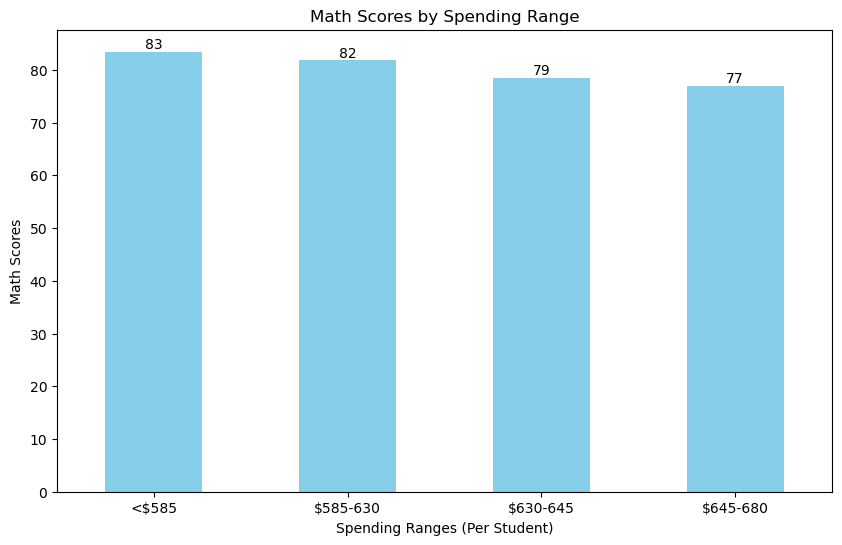

In [43]:
# Create bar chart for Average Math Score by Spending Range

# Group the data by spending ranges and calculate the average math score
spending_math_scores = spending_summary.groupby('Spending Ranges (Per Student)')['Spending Math Scores'].mean()

# Create a bar chart to visualize the average math scores by spending range
plt.figure(figsize=(10, 6))  
spending_math_scores.plot(kind='bar', color='skyblue')
plt.xlabel('Spending Ranges (Per Student)')
plt.ylabel('Math Scores')
plt.title('Math Scores by Spending Range')
plt.xticks(rotation=0)  

# Add labels for each bar
for index, value in enumerate(spending_math_scores):
    plt.text(index, value, str(round(value)), ha='center', va='bottom')

plt.show()


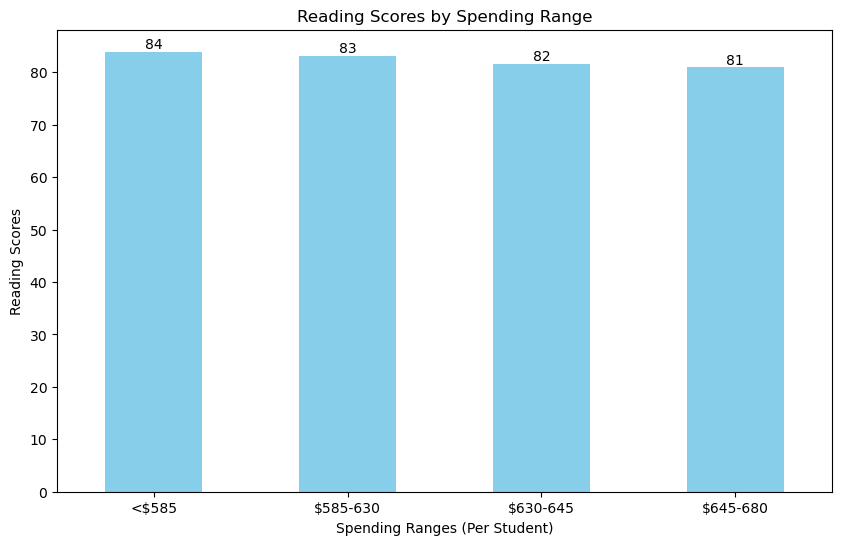

In [44]:
# Create bar chart for Average Math Score by Spending Range

# Group the data by spending ranges and calculate the average math score
spending_reading_scores = spending_summary.groupby('Spending Ranges (Per Student)')['Spending Reading Score'].mean()

# Create a bar chart to visualize the average math scores by spending range
plt.figure(figsize=(10, 6))  
spending_reading_scores.plot(kind='bar', color='skyblue')
plt.xlabel('Spending Ranges (Per Student)')
plt.ylabel('Reading Scores')
plt.title('Reading Scores by Spending Range')
plt.xticks(rotation=0)  

# Add labels for each bar
for index, value in enumerate(spending_reading_scores):
    plt.text(index, value, str(round(value)), ha='center', va='bottom')

plt.show()


## Scores by School Size

In [45]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [46]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.

#school_spending_df["Spending Ranges (Per Student)"] = pd.cut(per_school_capita, spending_bins, labels=labels, right=False)

per_school_summary["School Size"] = pd.cut(per_school_counts, size_bins, labels=labels, right=False)
per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,School Size
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,74.980853,85.805463,54.642283,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,74.980853,85.805463,91.334769,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,74.980853,85.805463,53.204476,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,74.980853,85.805463,54.289887,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,74.980853,85.805463,90.599455,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,74.980853,85.805463,53.527508,Large (2000-5000)
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,74.980853,85.805463,89.227166,Small (<1000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,74.980853,85.805463,53.513884,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,74.980853,85.805463,53.539172,Large (2000-5000)
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,74.980853,85.805463,90.540541,Small (<1000)


In [47]:
# Averages for the columns. 
size_math_scores = per_school_summary.groupby(["School Size"]).mean()["Average Math Score"]
size_reading_scores = per_school_summary.groupby(["School Size"]).mean()["Average Reading Score"]
size_passing_math = per_school_summary.groupby(["School Size"]).mean()["% Passing Math"]
size_passing_reading = per_school_summary.groupby(["School Size"]).mean()["% Passing Reading"]
size_overall_passing = per_school_summary.groupby(["School Size"]).mean()["% Overall Passing"]

In [48]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`

size_summary = pd.DataFrame(
    {
        "Average Math Score" : size_math_scores,
        "Average Reading Score": size_reading_scores,
        "% Passing Math": size_passing_math,
        "% Passing Reading": size_passing_reading,
        "% Overall Passing": size_overall_passing
    }
)

# Display results
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,74.980853,85.805463,89.883853
Medium (1000-2000),83.374684,83.864438,74.980853,85.805463,90.621535
Large (2000-5000),77.746417,81.344493,74.980853,85.805463,58.286003


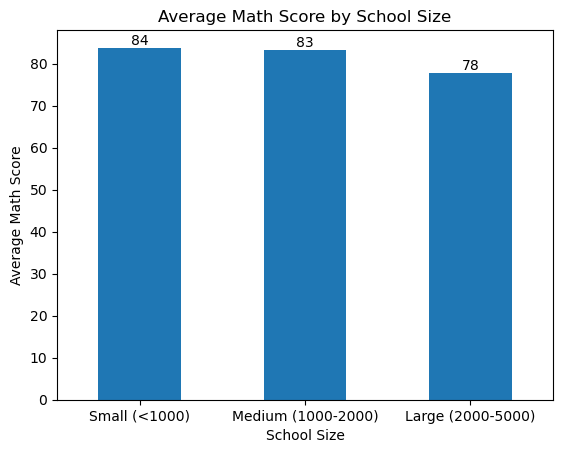

In [49]:
# Create bar chart for Average Math Score by School Size
size_summary.groupby('School Size')['Average Math Score'].mean().plot(kind='bar')
plt.xlabel('School Size')
plt.ylabel('Average Math Score')
plt.title('Average Math Score by School Size')
plt.xticks(rotation=0)  

# Add labels for each bar
for idx, value in enumerate(size_summary.groupby('School Size')['Average Math Score'].mean()):
    plt.annotate(round(value), (idx, value), ha='center', va='bottom')
    
plt.show()



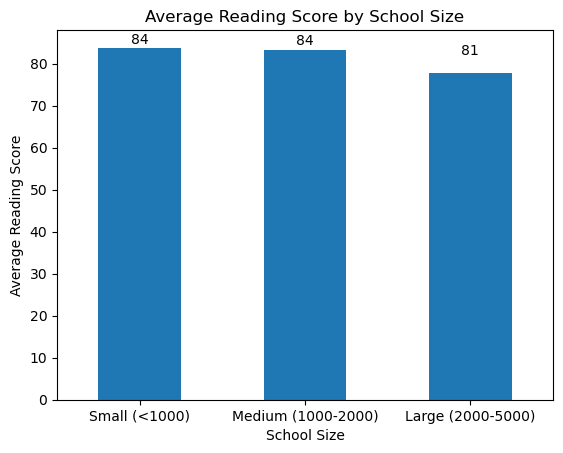

In [50]:
# Create bar chart for Average Math Score by School Size
size_summary.groupby('School Size')['Average Math Score'].mean().plot(kind='bar')
plt.xlabel('School Size')
plt.ylabel('Average Reading Score')
plt.title('Average Reading Score by School Size')
plt.xticks(rotation=0)  

# Add labels for each bar
for idx, value in enumerate(size_summary.groupby('School Size')['Average Reading Score'].mean()):
    plt.annotate(round(value), (idx, value), ha='center', va='bottom')
    
plt.show()

## Scores by School Type

In [51]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
# DataFrameVariable = loss_df.groupby(["Incident City"])

type_math_scores = per_school_summary.groupby(["School Type"]).mean()
type_reading_scores = per_school_summary.groupby(["School Type"]).mean()
type_passing_math = per_school_summary.groupby(["School Type"]).mean()
type_passing_reading = per_school_summary.groupby(["School Type"]).mean()
type_overall_passing = per_school_summary.groupby(["School Type"]).mean()




# Use the code provided to select new column data
average_math_score_by_type = type_math_scores["Average Math Score"]
average_reading_score_by_type = type_reading_scores["Average Reading Score"]
average_percent_passing_math_by_type = type_passing_math["% Passing Math"]
average_percent_passing_reading_by_type = type_passing_reading["% Passing Reading"]
average_percent_overall_passing_by_type = type_overall_passing["% Overall Passing"]

In [52]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary = pd.DataFrame(
    {
        "Average Math Score": average_math_score_by_type,
        "Average Reading Score": average_reading_score_by_type,
        "% Passing Math": average_percent_passing_math_by_type,
        "% Passing Reading": average_percent_passing_reading_by_type,
        "% Overall Passing": average_percent_overall_passing_by_type
    }
)

# Display results
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,74.980853,85.805463,90.432244
District,76.956733,80.966636,74.980853,85.805463,53.672208


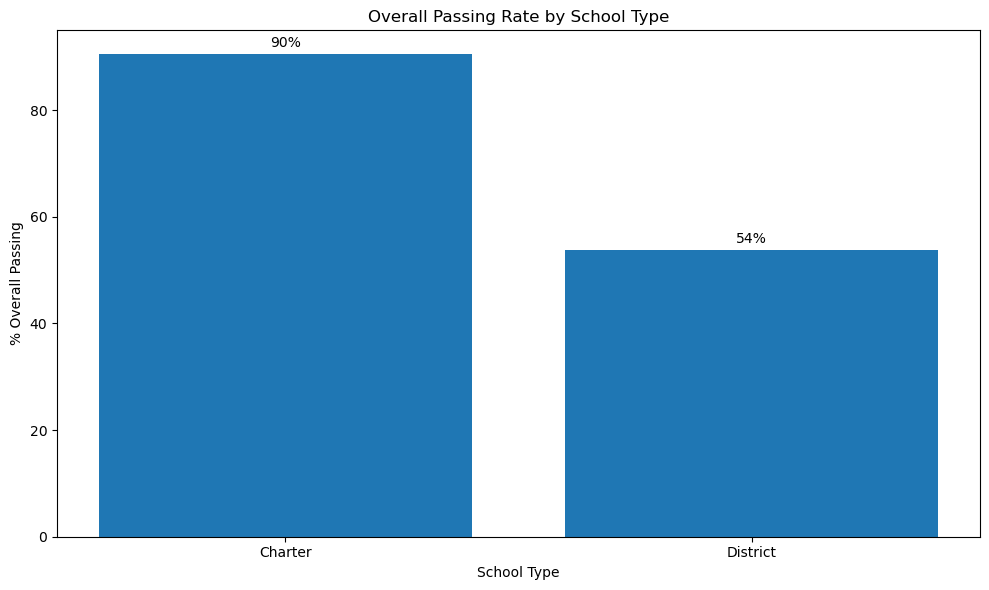

In [53]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = plt.bar(type_summary.index, type_summary['% Overall Passing'])

# Add labels and title
plt.xlabel('School Type')
plt.ylabel('% Overall Passing')
plt.title('Overall Passing Rate by School Type')

plt.xticks(rotation=0)

# Add labels for each bar (rounded to the nearest whole number)
for bar in bars:
    height = bar.get_height()
    rounded_height = round(height)  
    plt.annotate(f'{rounded_height}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()